# Find Steps in a Dataset - Solving With One Curve Fit

Consider the dataset shown below.

![file](step_in_dataset.png)

It looks like the first plot is the second one with random noise.
If it is, how to find the points that the data behaviour changes?

The idea is to fit the curve shown on the second plot in our data.
For that purpose, we use the curve fit function provided by the
SciPy optimize package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

## Define the step function

In [7]:
def f(x, x1, x2, y0, y1):
    x0 = 0 # The algorithm was not able to find those points but that
    x3 = 3 # is ok because they are the only two points we always know.
    return (y0 +\
            np.heaviside(x-x1,0) * (y1-y0)/(x2-x1) * (x-x1) * (1 - np.heaviside(x-x2,0)) +\
            (y1 - y0)*np.heaviside(x-x2,0) ) *\
            (1-np.heaviside(x-x3,0)) *\
            np.heaviside(x-x0,y0)

## Define Test Values

In [8]:
x0, x1, x2, x3 = 0, 1, 2, 3
y0, y1 = 1, 2

x_data = np.linspace(x0, x3, 1000)
y_data = f(x_data, x1, x2, y0, y1) + np.random.uniform(low=-1, high=+1, size=x_data.shape) # correct curve data
y = f(x_data, x1, x2, y0, y1) # noisy data

## Plot the original curve and the noisy curve

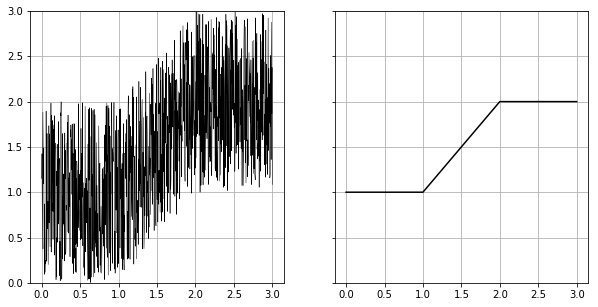

In [9]:
fig, ax = plt.subplots(1, 2, squeeze=True, sharey=True)
fig.set_size_inches((10,5))

ax[1].plot(x_data, y, color='k', linestyle='-')
ax[1].grid(True)

ax[0].plot(x_data, y_data, color='k', linestyle='-', linewidth=0.5)
ax[0].grid(True)

plt.ylim([0,y1+1])

plt.savefig('step_in_dataset.png')

plt.show()

## Fit curve and compare with analytical solution

In [5]:
[x1g, x2g, y0g, y1g], _ = scipy.optimize.curve_fit(f, x_data, y, p0=[1.3, 1.8, 0.7, 2.3])
print('{:5s}{:^20s} : {:^20s}'.format(' ', 'Original values', 'New values'))
print('{:5s} {:^20f} : {:^20f}'.format('x1', x1, x1g))
print('{:5s} {:^20f} : {:^20f}'.format('x2', x2, x2g))
print('{:5s} {:^20f} : {:^20f}'.format('y0', y0, y0g))
print('{:5s} {:^20f} : {:^20f}'.format('y1', y1, y1g))

       Original values    :      New values     
x1          1.000000       :       1.000000      
x2          2.000000       :       2.000000      
y0          1.000000       :       1.000000      
y1          2.000000       :       2.000000      
